In [1]:
pip install keras_preprocessing

Note: you may need to restart the kernel to use updated packages.


In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [21]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 180s 798ms/step - accuracy: 0.4708 - loss: 1.3732 - val_accuracy: 0.5236 - val_loss: 1.2403
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 183s 809ms/step - accuracy: 0.4861 - loss: 1.3413 - val_accuracy: 0.5266 - val_loss: 1.2402
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 180s 797ms/step - accuracy: 0.4949 - loss: 1.3255 - val_accuracy: 0.5478 - val_loss: 1.2093
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 157s 695ms/step - accuracy: 0.5100 - loss: 1.2858 - val_accuracy: 0.5498 - val_loss: 1.1875
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 108s 476ms/step - accuracy: 0.5158 - loss: 1.2644 - val_accuracy: 0.5508 - val_loss: 1.1818
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 108s 476ms/step - accuracy: 0.5238 - loss: 1.2408 - val_accuracy: 0.5575 - val_loss: 1.1779
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 109s 481ms/step - accuracy: 0.5285 - loss: 1.2314 - val_accuracy: 0.5630 - val_loss: 1.1580
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 110s 486ms/step - accuracy: 

In [38]:
from tensorflow.keras.models import model_from_json

In [39]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [40]:
with open('emotiondetector.json', 'r') as json_file:
    model_json = json_file.read()

model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [41]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [42]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [43]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
model prediction is  sad


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
model prediction is  sad


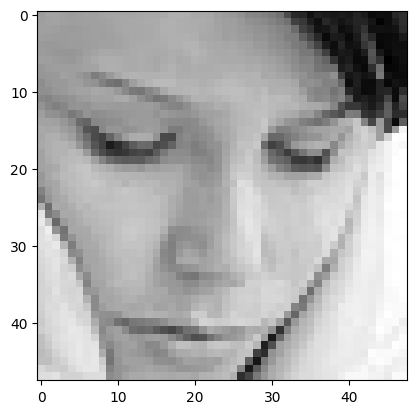

In [45]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
model prediction is  sad


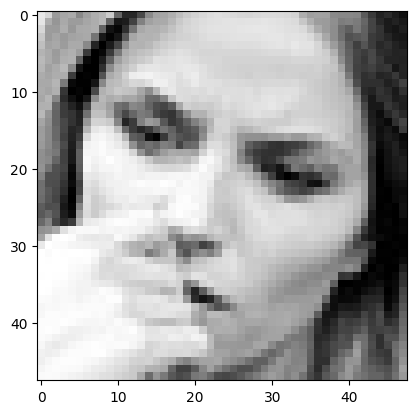

In [46]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')


original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
model prediction is  disgust


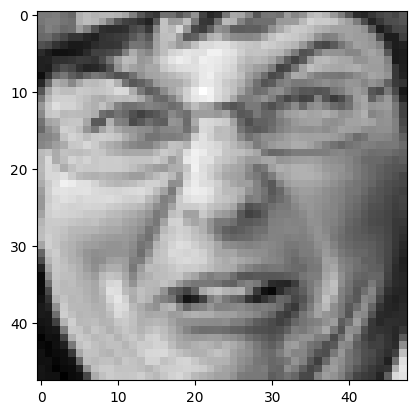

In [47]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
model prediction is  happy


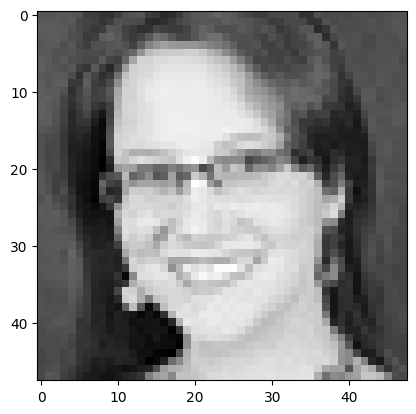

In [48]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
model prediction is  surprise


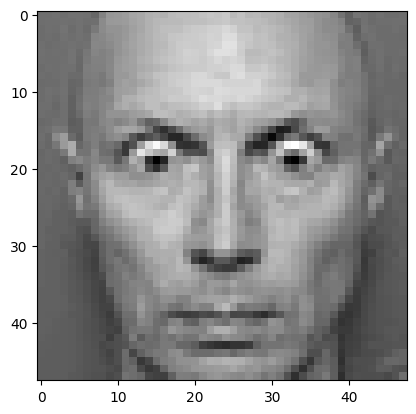

In [49]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

221/221 ━━━━━━━━━━━━━━━━━━━━ 29s 132ms/step


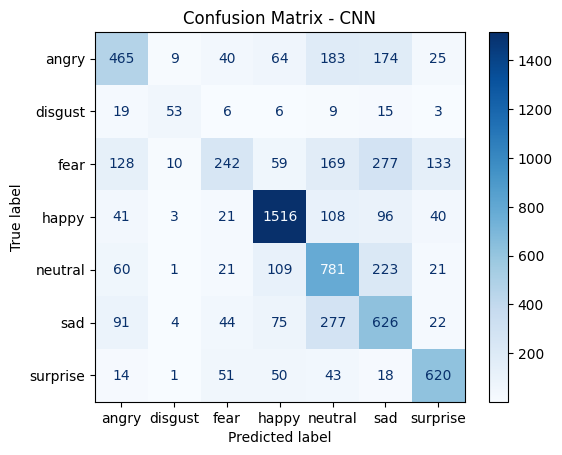

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to label indices
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to label indices

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - CNN")
plt.show()


Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6242 - loss: 0.9957 - val_accuracy: 0.6128 - val_loss: 1.0464
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6282 - loss: 0.9840 - val_accuracy: 0.6182 - val_loss: 1.0368
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6359 - loss: 0.9681 - val_accuracy: 0.6179 - val_loss: 1.0332
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.6408 - loss: 0.9635 - val_accuracy: 0.6152 - val_loss: 1.0365
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6356 - loss: 0.9550 - val_accuracy: 0.6200 - val_loss: 1.0362
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6406 - loss: 0.9559 - val_accuracy: 0.6223 - val_loss: 1.0207
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6387 - loss: 0.9506 - val_accuracy: 0.6193 - val_loss: 1.0312
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6476 - loss: 0.9476 - 

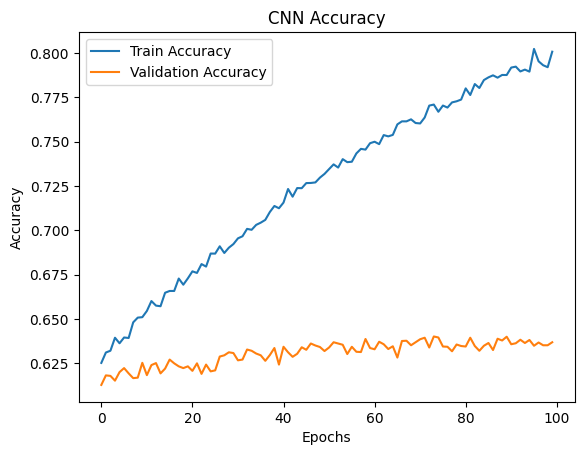

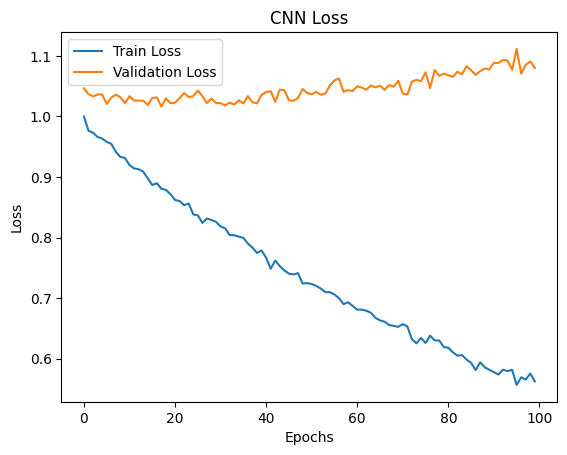

In [51]:
# Assuming `history` is the output of `model.fit()`
history = model.fit(x=x_train, 
                    y=y_train, 
                    batch_size=256, 
                    epochs=100, 
                    validation_data=(x_test, y_test))


# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss')
plt.show()


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


report = classification_report(y_true_classes, y_pred_classes, target_names=label)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.60      0.52      0.56       960
     disgust       0.87      0.59      0.70       111
        fear       0.52      0.42      0.46      1018
       happy       0.82      0.84      0.83      1825
     neutral       0.54      0.59      0.57      1216
         sad       0.48      0.55      0.51      1139
    surprise       0.76      0.78      0.77       797

    accuracy                           0.64      7066
   macro avg       0.66      0.61      0.63      7066
weighted avg       0.64      0.64      0.64      7066

Confusion Matrix:
[[ 503    5   83   63  138  145   23]
 [  14   65   10    5    9    4    4]
 [ 101    1  428   52  134  216   86]
 [  37    0   42 1529   83   85   49]
 [  73    1   67  121  723  216   15]
 [  94    2  113   63  221  628   18]
 [  12    1   80   38   20   22  624]]


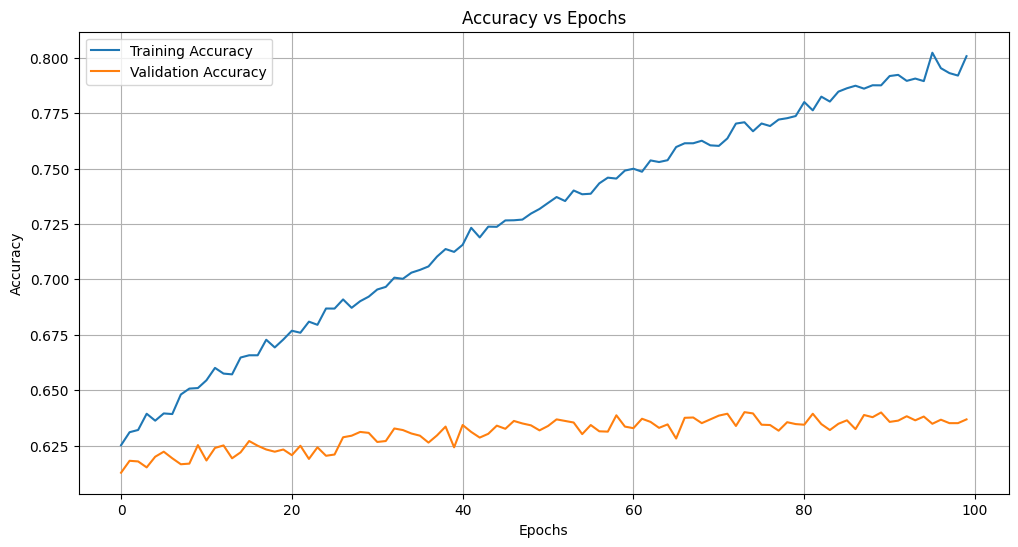

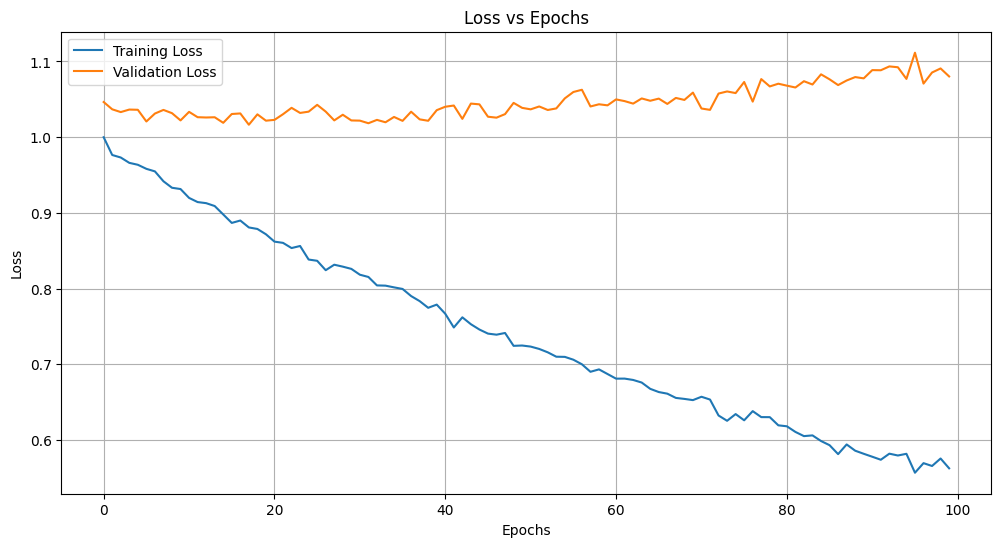

In [59]:
# Assuming `history` contains the training logs from `model.fit()`

import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid()
plt.show()


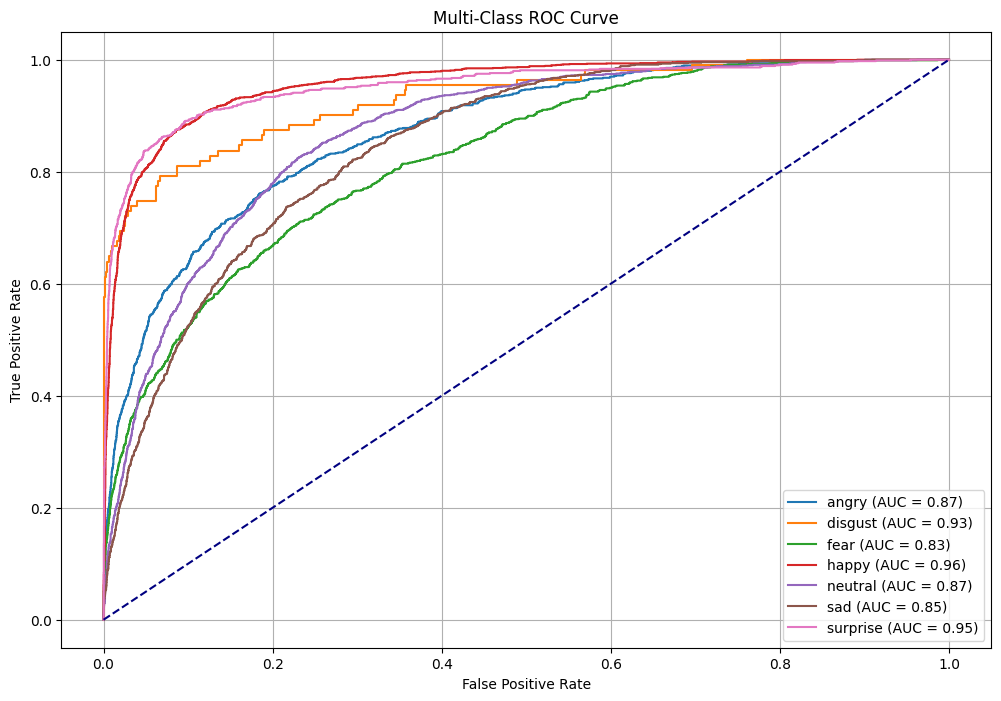

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=range(len(label)))

plt.figure(figsize=(12, 8))

# Compute ROC curve and AUC for each class
for i, class_name in enumerate(label):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

# Plot ROC Curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


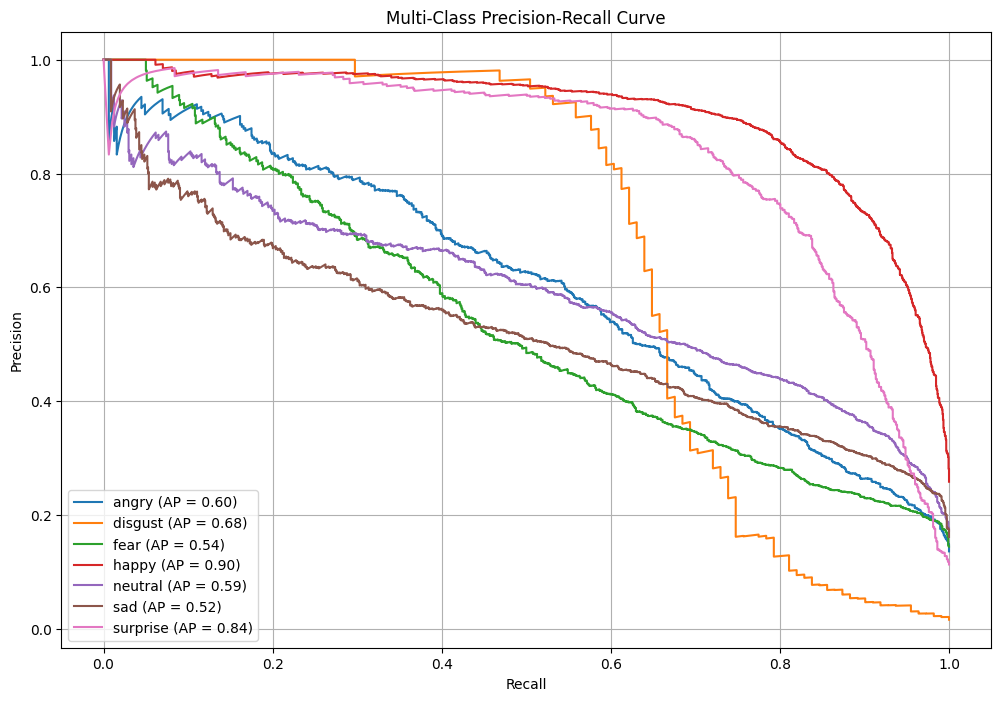

In [61]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(12, 8))

# Compute Precision-Recall curve for each class
for i, class_name in enumerate(label):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred[:, i])
    plt.plot(recall, precision, label=f'{class_name} (AP = {avg_precision:.2f})')

# Plot Precision-Recall Curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-Class Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()
